In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import datetime as dt


## Load, filter and transform the data

In [2]:
# load the data

data_folder = './MovieSummaries/'
plot = pd.read_csv(data_folder+'plot_summaries.txt', sep='	', header=None, names=["wiki_id", "summary"])
movie_meta = pd.read_csv(data_folder+'movie.metadata.tsv', sep='	', header=None, names=["wiki_id", "freebase_id", "movie_name", "release_date", "revenue", "runtime", "languages", "coutries", "genres"])
char_meta = pd.read_csv(data_folder+'character.metadata.tsv', sep='	', header=None, names=["wiki_id", "freebase_id", "release_date", "character_name", "birth", "gender", "height", "ethnicity", "actor_name", "actor_age", "character_actor_map", "character_id", "actor_id"])

# we dont load clusters of latent personas because we are not gonna use them

#tvtropes_clusters = pd.read_csv(data_folder+'tvtropes.clusters.txt')
#name_clusters = pd.read_csv(data_folder+'name.clusters.txt') 


In [3]:
# merge plot summaries database with movie meta database

df = plot.merge(movie_meta, on="wiki_id", how="right")
df.head()


,wiki_id,summary,freebase_id,movie_name,release_date,revenue,runtime,languages,coutries,genres
0,975900,"Set in the second half of the 22nd century, th...",/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,NaN,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,NaN,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,A series of murders of rich young women throug...,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,"Eva, an upper class housewife, becomes frustra...",/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [4]:
# change dicts into values

df["languages"] = df.apply(lambda x: list(eval(x["languages"]).values()), axis=1)
df["coutries"] = df.apply(lambda x: list(eval(x["coutries"]).values()), axis=1)
df["genres"] = df.apply(lambda x: list(eval(x["genres"]).values()), axis=1)


In [6]:
# change into datetime

df.summary = df.summary.fillna('')
df.loc[df['wiki_id']== 29666067, 'release_date'] = dt.datetime(2010, 12, 2)
dates = pd.to_datetime(df['release_date'])
df['release_date'] = dates


In [7]:
#df = df[df["release_date"].dt.year < 1915]
long_movies = df[df.genres.apply(lambda x : not "Short Film" in x)]
long_movies_us = df[df.coutries.apply(lambda x : "United States of America" in x)]
long_movies_us

,wiki_id,summary,freebase_id,movie_name,release_date,revenue,runtime,languages,coutries,genres
0,975900,"Set in the second half of the 22nd century, th...",/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
1,3196793,,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]"
5,13696889,,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"[Silent film, English Language]",[United States of America],"[Short Film, Silent film, Indie, Black-and-whi..."
7,10408933,,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,[English Language],[United States of America],"[Musical, Comedy, Black-and-white]"
10,175026,,/m/017n1p,Sarah and Son,1930-01-01,NaN,86.0,[English Language],[United States of America],"[Drama, Black-and-white]"
...,...,...,...,...,...,...,...,...,...,...
81725,1918494,Havoc is wrought on the inhabitants of a small...,/m/0660qx,State and Main,2000-08-26,6944471.0,106.0,"[Italian Language, English Language]","[France, United States of America]","[Parody, Americana, Comedy]"
81726,664006,Jennifer Haines is an up-and-coming Chicago a...,/m/030xw6,Guilty as Sin,1993-06-04,22886222.0,107.0,[],[United States of America],"[Thriller, Erotic thriller, Psychological thri..."
81727,24209227,,/m/07k5mlk,"The Time, the Place and the Girl",1946-01-01,NaN,105.0,[English Language],[United States of America],"[Comedy film, Romance Film, Musical]"
81736,35228177,Two former National Oceanic Atmospheric Admini...,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,[English Language],[United States of America],[Drama]


## NLP


Text(0.5, 1.0, 'Proportion of War Films by year')

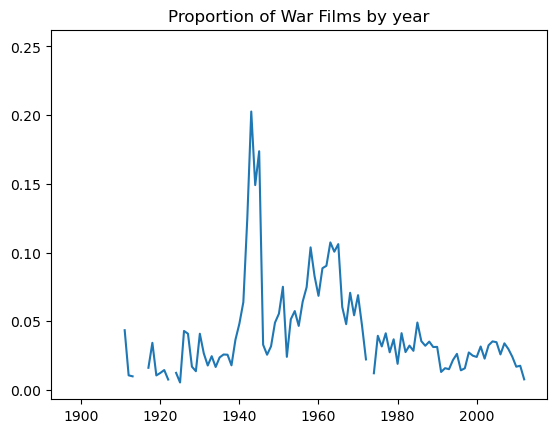

In [8]:
# What is the proportion of war films over the years?
df = long_movies_us
num_of_movies_by_year = df.groupby(df.release_date.dt.year)['wiki_id'].count()
war_movies_genre = df[df.genres.apply(lambda x :'War film' in x)]
war_movies_by_year_genre = war_movies_genre.groupby(war_movies_genre.release_date.dt.year)['wiki_id'].count()
war_movies_by_year_genre = war_movies_by_year_genre/num_of_movies_by_year
plt.plot(war_movies_by_year_genre)
plt.title("Proportion of War Films by year")


In [9]:
# return 1 when a set of words is used in the plot summary

def summary_contains_words(summary, words):
    if str(summary) == "nan":
        return 0
    for word in words:
        strings = summary.lower().split(" ")
        if word in summary.lower().split(" "):
            return 1
    return 0
   

/tmp/ipykernel_36166/1020694306.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["war_related"] = df.apply(lambda x: summary_contains_words(x["summary"], war_related), axis=1)


Text(0.5, 1.0, 'Proportion of War Films by year')

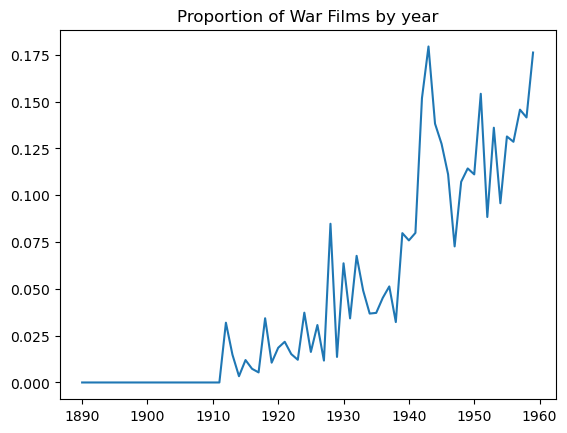

In [10]:
# How often do the words related to war show up in plot summaries by year ?

war_related = ["war", "warfare", "battle", "military", "soldier", "jihad", "crusade"]
df = df[df["release_date"].dt.year < 1960]
df["war_related"] = df.apply(lambda x: summary_contains_words(x["summary"], war_related), axis=1)
num_of_movies_by_year = df.groupby(df.release_date.dt.year)['wiki_id'].count()
war_movies = df[df.war_related.apply(lambda x : x == 1)]
war_movies_by_year = war_movies.groupby(war_movies.release_date.dt.year)['wiki_id'].count()
war_movies_by_year_proportion = war_movies_by_year/num_of_movies_by_year
war_movies_proportion_without_nan = war_movies_by_year_proportion.fillna(0)
plt.plot(war_movies_proportion_without_nan)
plt.title("Proportion of War Films by year")

/tmp/ipykernel_36166/2159971346.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["war_related"] = df.apply(lambda x: summary_contains_words(x["summary"], war_related), axis=1)


Text(0.5, 1.0, 'Proportion of War Films by year')

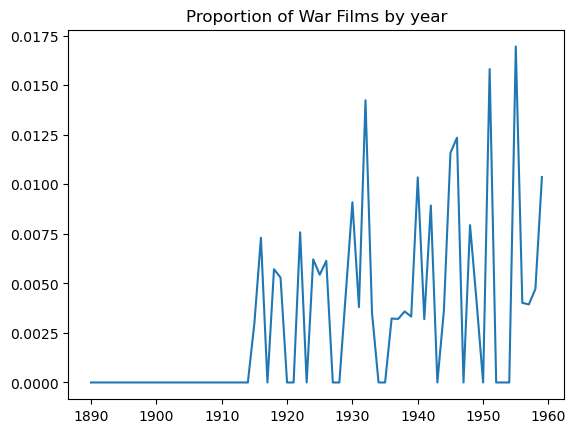

In [11]:
# How often do the words related to war show up in plot summaries by year ?

war_related = ["thief"]
df["war_related"] = df.apply(lambda x: summary_contains_words(x["summary"], war_related), axis=1)
num_of_movies_by_year = df.groupby(df.release_date.dt.year)['wiki_id'].count()
war_movies = df[df.war_related.apply(lambda x : x == 1)]
war_movies_by_year = war_movies.groupby(war_movies.release_date.dt.year)['wiki_id'].count()
war_movies_by_year_proportion = war_movies_by_year/num_of_movies_by_year
war_movies_proportion_without_nan = war_movies_by_year_proportion.fillna(0)
plt.plot(war_movies_proportion_without_nan)
plt.title("Proportion of War Films by year")

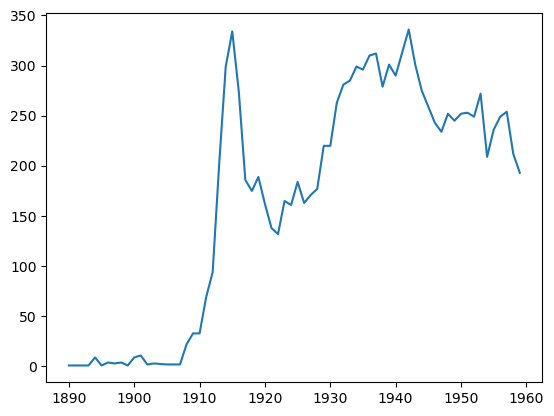

In [12]:
df = df[df["release_date"].dt.year < 1980]
number_of_movies = df.groupby(df.release_date.dt.year)['wiki_id'].count()
plt.plot(number_of_movies)

In [ ]:
df["revenue"].dropna()

In [ ]:
movie_meta.sort_values(by="revenue", ascending=False)
#movie_meta.loc[movie_meta["movie_name"] == "Brokeback Mountain"]
#movie_meta["cat"] = 
#movie_meta["g"] = (movie_meta["genres"].values).values()

movie_meta

In [7]:
m1 = movie_meta.dropna(subset=["release_date"])
m1.sort_values(by="release_date", ascending=False)


,wiki_id,freebase_id,movie_name,release_date,revenue,runtime,languages,coutries,genres
34022,23124260,/m/064mmw7,Jeepers Creepers 4,2016-06-08,NaN,NaN,{},"{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/03npn"": ""Horror""}"
30275,27554912,/m/0c03gcc,Kung Fu Panda 3,2016-03-18,NaN,NaN,{},{},{}
64862,3139382,/m/08tyfg,Battle Angel,2016,NaN,NaN,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
53855,32416903,/m/0gys9tc,Total Dhamaal,2015,NaN,138.00,"{""/m/03k50"": ""Hindi Language""}",{},"{""/m/05p553"": ""Comedy film""}"
8307,24179103,/m/0jwx0kc,"I, Robot 2",2015,NaN,NaN,{},{},"{""/m/06n90"": ""Science Fiction""}"
...,...,...,...,...,...,...,...,...,...
60249,22770416,/m/0gj9h_4,London's Trafalgar Square,1890,NaN,NaN,"{""/m/06ppq"": ""Silent film""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen..."
53907,6431996,/m/0g53t3,"Monkeyshines, No. 1",1890,NaN,NaN,"{""/m/06ppq"": ""Silent film""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film""}"
38764,12170539,/m/02vs8rb,"Leisurely Pedestrians, Open Topped Buses and H...",1889,NaN,NaN,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/07ssc"": ""United Kingdom""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen..."
57963,1082508,/m/044ggd,Roundhay Garden Scene,1888,NaN,0.03,"{""/m/06ppq"": ""Silent film""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen..."


In [8]:
char_meta
char_meta.loc[char_meta["wiki_id"] == 24179103]
char_meta

,wiki_id,freebase_id,release_date,character_name,birth,gender,height,ethnicity,actor_name,actor_age,character_actor_map,character_id,actor_id
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450664,913762,/m/03pcrp,1992-05-21,Elensh,1970-05,F,NaN,NaN,Dorothy Elias-Fahn,NaN,/m/0kr406c,/m/0kr406h,/m/0b_vcv
450665,913762,/m/03pcrp,1992-05-21,Hibiki,1965-04-12,M,NaN,NaN,Jonathan Fahn,27.0,/m/0kr405_,/m/0kr4090,/m/0bx7_j
450666,28308153,/m/0cp05t9,1957,NaN,1941-11-18,M,1.730,/m/02w7gg,David Hemmings,15.0,/m/0g8ngmc,NaN,/m/022g44
450667,28308153,/m/0cp05t9,1957,NaN,NaN,NaN,NaN,NaN,Roberta Paterson,NaN,/m/0g8ngmj,NaN,/m/0g8ngmm
